In [2]:
import requests
import json
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#load in shot df and player df
df_shot = pd.read_excel("/Users/lb/Desktop/analytics/w_analytics/new_dtwom_22/shot_final.xlsx")
df_player = pd.read_excel("/Users/lb/Desktop/analytics/w_analytics/new_dtwom_22/2022_players.xlsx")



In [4]:
#merge dataframes only keeping df_shot rows if the player is in df_player
df_total = pd.merge(df_shot, df_player, how="right")
df_total.to_excel("/Users/lb/Desktop/analytics/w_analytics/new_dtwom_22/shot_total.xlsx")

In [5]:
#for offensive rebounds!!!!!!
def team_list(game_dict, team_id):
    event_list = []
    for event_dict in game_dict['g']["pd"]:
        for index, event in enumerate(event_dict["pla"]):     
            if event["tid"] == team_id:
                
                #making sure the shot was not blocked with this line of code
                #a blocked shot will have missed in event["de"] and event["opid"] == team id number
                if "Missed" not in event["de"] or event["opid"] == '':
                    
                    ##############################################
                    if "Shot" in event["de"] or "shot" in event["de"]:

                        if "3pt" in event["de"]:
                            
                            #3 rebs, 1 block, (3-pointer)
                            #offensive rebound signified by ["opt1"] ==1 and ["etype"] == 4
                            if event_dict["pla"][index-5]["opt1"] == 1 and event_dict["pla"][index-5]["etype"] == 4 and event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and (event_dict["pla"][index-2]["opid"]!='' or event_dict["pla"][index-4]["opid"]!='' or event_dict["pla"][index-6]["opid"]!=''):
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 2])
                                
                            #3 rebs, no blocks (3-pointer)
                            elif event_dict["pla"][index-5]["opt1"] == 1 and event_dict["pla"][index-5]["etype"] == 4 and event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 3])
                               
                            #2 rebs 1 block (3-pointer)
                            elif event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and (event_dict["pla"][index-2]["opid"]!='' or event_dict["pla"][index-4]["opid"]!=''):                                   
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 1])
                            
                            
                            #2 rebs no blocks (3-pointer)
                            elif event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:                                   
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 2])
                               
                            #1 reb but it went out of bounds or team called timeout or foul
                            elif event_dict["pla"][index-2]["opt1"] == 1 and event_dict["pla"][index-2]["etype"] == 4 and ("Stoppage: Out-of-Bounds" in event_dict["pla"][index-1]["de"] or "Team Timeout" in event_dict["pla"][index-1]["de"] or "Foul" in event_dict["pla"][index-1]["de"]):                                 
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 1])
                            
                            
                            #1 rebs no blocks (3-pointer)
                            elif event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and event_dict["pla"][index-2]["opid"]=='':                                 
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 1])

                        #no rebs no blocks or 1 reb 1 block (3-pointer)
                            else:
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 3, 0])                               

                    ############################# 2-pointers#########
                        elif "Clock" not in event["de"]:
                            #offensive rebound signified by ["opt1"] ==1 and ["etype"] == 4
                            #3 rebs, 1 block, (2-pointer)
                            if event_dict["pla"][index-5]["opt1"] == 1 and event_dict["pla"][index-5]["etype"] == 4 and event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and (event_dict["pla"][index-2]["opid"]!='' or event_dict["pla"][index-4]["opid"]!='' or event_dict["pla"][index-6]["opid"]!=''):
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 2])
                                
                            #3 rebs, no blocks (2-pointer)
                            elif event_dict["pla"][index-5]["opt1"] == 1 and event_dict["pla"][index-5]["etype"] == 4 and event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 3])
                               
                            #2 rebs 1 block (2-pointer)
                            elif event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and (event_dict["pla"][index-2]["opid"]!='' or event_dict["pla"][index-4]["opid"]!=''):                                   
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 1])
                            
                            
                            #2 rebs no blocks (2-pointer)
                            elif event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:                                   
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 2])
                               
                            #1 reb but it went out of bounds or team called timeout
                            elif event_dict["pla"][index-2]["opt1"] == 1 and event_dict["pla"][index-2]["etype"] == 4 and ("Stoppage: Out-of-Bounds" in event_dict["pla"][index-1]["de"] or "Team Timeout" in event_dict["pla"][index-1]["de"] or "Foul" in event_dict["pla"][index-1]["de"]):                                 
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 1])
                            
                            
                            #1 rebs no blocks (2-pointer)
                            elif event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and event_dict["pla"][index-2]["opid"]=='':                                 
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 1])

                        #no rebs no blocks or 1 reb 1 block (3-pointer)
                            else:
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 2, 0])    
                            
                            


                    ####################################
                    elif "Free Throw" in event["de"]:

                        #free throw after 3 rebounds
                        if event_dict["pla"][index-5]["opt1"] == 1 and event_dict["pla"][index-5]["etype"] == 4 and event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:
                            event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 1, 3])

                        #free throw after 2 rebs               
                        elif event_dict["pla"][index-3]["opt1"] == 1 and event_dict["pla"][index-3]["etype"] == 4 and event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4:
                            event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 1, 2])

                        #1 reb but it went out of bounds or team called timeout
                        elif event_dict["pla"][index-2]["opt1"] == 1 and event_dict["pla"][index-2]["etype"] == 4 and ("Stoppage: Out-of-Bounds" in event_dict["pla"][index-1]["de"] or "Team Timeout" in event_dict["pla"][index-1]["de"] or "Foul" in event_dict["pla"][index-1]["de"]):                                 
                                event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"],1, 1])                            
                            
                        #free throw after 1 reb           
                        elif event_dict["pla"][index-1]["opt1"] == 1 and event_dict["pla"][index-1]["etype"] == 4 and event_dict["pla"][index-1]["pid"]!= 0:
                            event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 1, 1])                                

                        else:
                            event_list.append([(((event["locX"]**2 + event["locY"]**2)**.5 )/10.05), event["pid"], 1, 0])                                                

    return event_list


#this fnt will record each scoring event's prob of success, point value, and orebs preceding it

def event_probabilities(team_event_list, df_league):
    #list with all event probs, point values, and orebs preceding it
    team_event_prob_list = [] 
    for event in team_event_list:
            if event[0] == 7.960199004975124:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "ft%"]), event[2] , event[3]])
            elif event[0] < 5:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "under_5_%"]), event[2] , event[3]])  
            elif event[0] < 9.5 and event[0] > 5:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "5_9_%"]), event[2] , event[3]])                   
            elif event[0] < 14.5 and event[0] > 9.5:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "10_14_%"]), event[2] , event[3]])     
            elif event[0] < 19.5 and event[0] > 14.5:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "15_19_%"]), event[2] , event[3]])  
            elif event[0] < 24 and event[0] > 19.5:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "20_24_%"]), event[2] , event[3]])
            elif event[0] > 24:
                team_event_prob_list.append([float(df_league.loc[df_league["pid"]==event[1], "over_24_%"]), event[2] , event[3]])
        
    return team_event_prob_list


#this fnt will simulate each team's scoring based on events
def expected_points(team_event_prob_list):
    xp_list = []
    total_xp = 0
    
    for index, event in enumerate(team_event_prob_list):
        ####tally up points for no previous rebounds#####
        if event[2] == 0:
            xp_list.append(event[0]*event[1])
            total_xp += event[0]*event[1]

#tally up points for one prior oreb...will discount it
        if event[2] == 1:
            xp_list.append(event[0] * event[1] * (1-(team_event_prob_list[index-1][0])))
            total_xp += event[0] * event[1] * (1-(team_event_prob_list[index-1][0]))


#tally up points for two prior orebs...will discount it
        if event[2] == 2:
            xp_list.append( event[0] * event[1] * ((1-(team_event_prob_list[index-2][0]))  * (1-(team_event_prob_list[index-1][0]))))
            total_xp +=  event[0] * event[1] * ((1-(team_event_prob_list[index-2][0]))  * (1-(team_event_prob_list[index-1][0])))


#tally up points for three prior orebs...will discount it
        if event[2] == 3:
            xp_list.append(event[0] * event[1] * ((1-(team_event_prob_list[index-3][0]))  * (1-(team_event_prob_list[index-2][0]))  * (1-(team_event_prob_list[index-1][0]))))
            total_xp += event[0] * event[1] * ((1-(team_event_prob_list[index-3][0]))  * (1-(team_event_prob_list[index-2][0]))  * (1-(team_event_prob_list[index-1][0])))

    return xp_list, total_xp



#ftn for extracting pids and matching to player
def player_list_fnt(game_dict):
    player_list = []
    player_list_unique = []
    event_unique = []
    for event_dict in game_dict['g']["pd"]:
        for event in (event_dict["pla"][2:]):
            player_list.append([event["pid"], event["de"]])
            
    for unique_event in player_list:
        if unique_event[0] not in player_list_unique:
            player_list_unique.append(unique_event[0])
            event_unique.append(unique_event[1])
            
    #sort list to df
    df_pid = pd.DataFrame(player_list_unique) 
    df_pid["event"] = event_unique
    df_pid.to_excel("/Users/lb/Desktop/pid_excel.xlsx")

#player_list_fnt(game_data)


In [17]:
#############UPDATE############
url = "https://data.wnba.com/data/10s/v2015/json/mobile_teams/wnba/2022/scores/pbp/1042200131_full_pbp.json"
r = requests.get(url)
game_data = r.json()

#this function will find the team pids
def team_pids(game_dict):
    away_team_id = 0
    home_team_id = 0
    
    code = game_dict["g"]["gcode"]
    if code[-6:-3] == "ATL":
        away_team_id = 1611661330
    elif code[-6:-3] == "CHI":
        away_team_id = 1611661329
    elif code[-6:-3] == "CON":
        away_team_id = 1611661323        
    elif code[-6:-3] == "DAL":
        away_team_id = 1611661321        
    elif code[-6:-3] == "IND":
        away_team_id = 1611661325
    elif code[-6:-3] == "MIN":
        away_team_id = 1611661324        
    elif code[-6:-3] == "LAS":
        away_team_id = 1611661320        
    elif code[-6:-3] == "LVA":
        away_team_id = 1611661319
    elif code[-6:-3] == "NYL":
        away_team_id = 1611661313        
    elif code[-6:-3] == "PHO":
        away_team_id = 1611661317
    elif code[-6:-3] == "SEA":
        away_team_id = 1611661328        
    elif code[-6:-3] == "WAS":
        away_team_id = 1611661322 
        
    if code[-3:] == "ATL":
        home_team_id = 1611661330
    elif code[-3:] == "CHI":
        home_team_id = 1611661329
    elif code[-3:] == "CON":
        home_team_id = 1611661323        
    elif code[-3:] == "DAL":
        home_team_id = 1611661321        
    elif code[-3:] == "IND":
        home_team_id = 1611661325
    elif code[-3:] == "MIN":
        home_team_id = 1611661324        
    elif code[-3:] == "LAS":
        home_team_id = 1611661320        
    elif code[-3:] == "LVA":
        home_team_id = 1611661319
    elif code[-3:] == "NYL":
        home_team_id = 1611661313        
    elif code[-3:] == "PHO":
        home_team_id = 1611661317
    elif code[-3:] == "SEA":
        home_team_id = 1611661328        
    elif code[-3:] == "WAS":
        home_team_id = 1611661322
    
    return away_team_id, home_team_id
        
team_a_id, team_b_id = team_pids(game_data)
print(team_a_id, team_b_id)


1611661322 1611661328


73.40868078698212 65.75730007837099


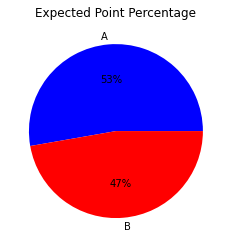

In [18]:
#team_a_events
team_a_event_list = (team_list(game_data, team_a_id))
#print((team_a_event_list))

#team b events
team_b_event_list = (team_list(game_data, team_b_id))
#print((team_b_event_list))

#team a event probs
team_a_event_prob_list = event_probabilities(team_a_event_list, df_total)
#print(team_a_event_prob_list)

#team b event probs
team_b_event_prob_list = event_probabilities(team_b_event_list, df_total)
#print(team_b_event_prob_list)

team_a_xp_list, team_a_xp = expected_points(team_a_event_prob_list)
#print (team_a_xp_list, team_a_xp)

team_b_xp_list, team_b_xp = expected_points(team_b_event_prob_list)
#print (team_b_xp_list, team_b_xp)

print(team_a_xp, team_b_xp)

data = [team_a_xp, team_b_xp]

#####UPDATE########
labels = ["A", "B"]

#####UPDATE########
colors = ["blue", "red"]

plt.pie(data, labels = labels, colors =colors, autopct='%.0f%%')
plt.title("Expected Point Percentage")
plt.show() 
